In [1]:
from sklearn.cluster import KMeans
import numpy as np
import rasterio

In [2]:
naipfile = 'C:/Users/kaitl/Desktop/test.tif'
bands = 3

with rasterio.open(naipfile) as src:
    # get the dimensions of the input file 
    #loop through the bands to create a stacked array
    naip = np.empty((src.width*src.height, bands))
    for i in range(1, bands + 1):
        print('Reading band ' + str(i))
        b = src.read(i)
        naip[:, i-1] = b.flatten()

Reading band 1
Reading band 2
Reading band 3


In [14]:
def kmModel(arr,src, outfile):
    # classify using kmeans
    print('Kmeans classification')
    km = KMeans(n_clusters=2) # 2 classes
    print('Fit the model')
    km.fit(naip)
    print('Predict')
    km.predict(naip)

    # format the predicted classes to the shape of the original image
    print('Reshape the classes to fit the dimensions of the input image')
    outfile = km.labels_.reshape((src.height, src.width))

    
kmModel(naip, src, naipout)

Kmeans classification
Fit the model
Predict
Reshape the classes to fit the dimensions of the input image


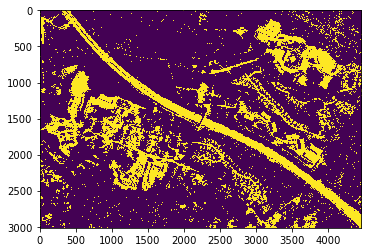

In [15]:
from matplotlib.pyplot import imshow

imshow(naipout, interpolation="nearest")  